## Clustering of Potential Rice-Producing Areas in Indonesia Using the K-Means Clustering Method

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data = pd.read_excel('D:/Kuliah/Semester 4/Teknik Sampling/Luas Panen, Produksi, dan Produktivitas Padi 2021 Fix.xlsx')
data

,Provinsi,Kabupaten/Kota,Luas_Panen,Produksi,Produktivitas
0,Aceh,Simeulue,7467.23,29531.60,39.548266
1,NaN,Aceh Singkil,647.35,3352.40,51.786514
2,NaN,Aceh Selatan,9012.61,45434.54,50.412189
3,NaN,Aceh Tenggara,10589.75,71180.62,67.216525
4,NaN,Aceh Timur,27439.72,138588.25,50.506437
...,...,...,...,...,...
389,NaN,Boven Digoel,1.78,7.70,43.258427
390,NaN,Sarmi,21.38,78.94,36.922357
391,NaN,Keerom,31.16,135.92,43.620026
392,NaN,Waropen,12.87,56.49,43.892774


In [49]:
data.columns = data.columns.str.strip()
print(data.Luas_Panen)

0       7467.23
1        647.35
2       9012.61
3      10589.75
4      27439.72
         ...   
389        1.78
390       21.38
391       31.16
392       12.87
393      820.42
Name: Luas_Panen, Length: 394, dtype: float64


In [50]:
data.head()

,Provinsi,Kabupaten/Kota,Luas_Panen,Produksi,Produktivitas
0,Aceh,Simeulue,7467.23,29531.60,39.548266
1,NaN,Aceh Singkil,647.35,3352.40,51.786514
2,NaN,Aceh Selatan,9012.61,45434.54,50.412189
3,NaN,Aceh Tenggara,10589.75,71180.62,67.216525
4,NaN,Aceh Timur,27439.72,138588.25,50.506437


In [51]:
data.shape

(394, 5)

In [52]:
data.dtypes

Provinsi           object
Kabupaten/Kota     object
Luas_Panen        float64
Produksi          float64
Produktivitas     float64
dtype: object

In [53]:
data.isnull().sum()

Provinsi          368
Kabupaten/Kota      0
Luas_Panen          0
Produksi            0
Produktivitas       0
dtype: int64

#### Mengatasi Outlier

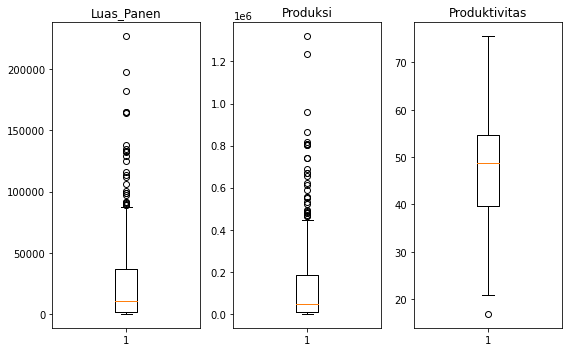

In [54]:
numerical_col = ["Luas_Panen", "Produksi", "Produktivitas"]
plt.figure(figsize=(8, 5))

for i, variable in enumerate(numerical_col):
    plt.subplot(1, 3, i+1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [55]:
# function to treat outliers by flooring and capping

def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df

def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

data = treat_outliers_all(data, numerical_col)

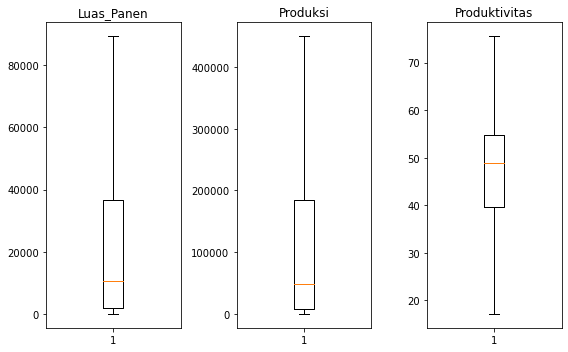

In [56]:
numerical_col = ["Luas_Panen", "Produksi", "Produktivitas"]
plt.figure(figsize=(8, 5))

for i, variable in enumerate(numerical_col):
    plt.subplot(1, 3, i+1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### K-Means Clustering

In [60]:
x_train = data[["Luas_Panen", "Produksi", "Produktivitas"]].values

#### Feature Scalling

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[8.36256249e-02, 6.56587619e-02, 3.83552531e-01],
       [7.24855761e-03, 7.45306879e-03, 5.93209159e-01],
       [1.00932615e-01, 1.01016666e-01, 5.69665236e-01],
       ...,
       [3.47734556e-04, 3.01687237e-04, 4.53306907e-01],
       [1.42901544e-04, 1.25086034e-04, 4.57979428e-01],
       [9.18679978e-03, 6.39275010e-03, 3.06476501e-01]])

#### Mencari Jumlah k Terbaik

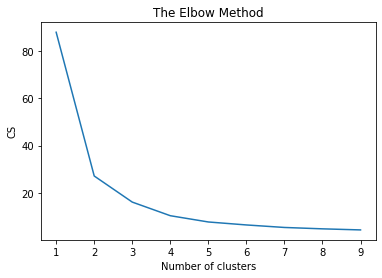

In [62]:
# Elbow method
from sklearn.cluster import KMeans
cs = []
for i in range (1,10):
    kmeans = KMeans(n_clusters=i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_train)
    cs.append(kmeans.inertia_)
plt.plot(range(1,10), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [63]:
# Silhouette method
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=300)
    kmeans.fit(x_train)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(x_train, cluster_labels)
    print("For n_cluster={0}, the silhoutte score is {1}".format(num_clusters, silhouette_avg))

For n_cluster=2, the silhoutte score is 0.6274297755071471
For n_cluster=3, the silhoutte score is 0.55147822859616
For n_cluster=4, the silhoutte score is 0.4686752066859879
For n_cluster=5, the silhoutte score is 0.48112419927312156
For n_cluster=6, the silhoutte score is 0.46929067114096096
For n_cluster=7, the silhoutte score is 0.42386004075171607
For n_cluster=8, the silhoutte score is 0.42705056340092035


#### Jumlah k = 2 Terbaik

In [64]:
kmeans = KMeans(n_clusters = 2, random_state = 0)
kmeans

KMeans(n_clusters=2, random_state=0)

In [65]:
y_cluster = kmeans.fit_predict(x_train)

In [66]:
data['Cluster'] = y_cluster

In [67]:
kmeans.cluster_centers_

array([[0.1014949 , 0.09453351, 0.4801793 ],
       [0.7147018 , 0.7440232 , 0.6395027 ]])

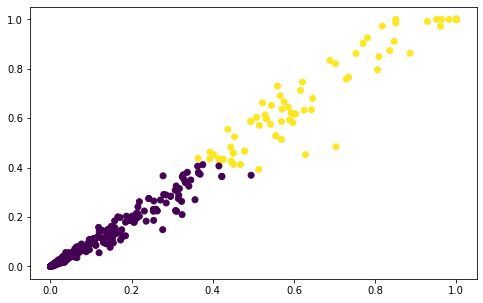

In [68]:
plt.figure(figsize=(8,5))
plt.scatter(x_train[:,0], x_train[:,1], c = kmeans.labels_)

In [69]:
data["Cluster"] = data["Cluster"].astype("object")

data.loc[data.Cluster==0, "Cluster"] = "Produktivitas Rendah"
data.loc[data.Cluster==1, "Cluster"] = "Produktivitas Tinggi"

In [70]:
data.groupby(["Cluster"]).count()

,Provinsi,Kabupaten/Kota,Luas_Panen,Produksi,Produktivitas
Cluster,,,,,
Produktivitas Rendah,22,295,295,295,295
Produktivitas Tinggi,4,99,99,99,99


In [71]:
data.groupby(["Cluster"]).describe().T

Cluster              Produktivitas Rendah  Produktivitas Tinggi
Luas_Panen    count            295.000000             99.000000
              mean            9062.818169          63817.440025
              std            10058.412526          19977.891199
              min                0.110000          32480.030000
              25%             1014.100000          46940.260000
              50%             4969.590000          57426.460000
              75%            13966.870000          89292.357500
              max            44146.350000          89292.357500
Produksi      count            295.000000             99.000000
              mean           42518.607729         334639.870442
              std            48993.705993         100187.278878
              min                0.230000         176533.790000
              25%             4588.275000         253232.155000
              50%            20956.170000         320330.700000
              75%            65582.605000         449770.666250
              max           185218.000000         449770.666250
Produktivitas count            295.000000             99.000000
              mean              45.188643             54.488799
              std               10.280631              5.842136
              min               17.159224             34.675918
              25%               38.178379             51.115311
              50%               44.419716             54.582520
              75%               52.146389             58.722013
              max               75.532042             66.280204

### Visualisasi Data

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

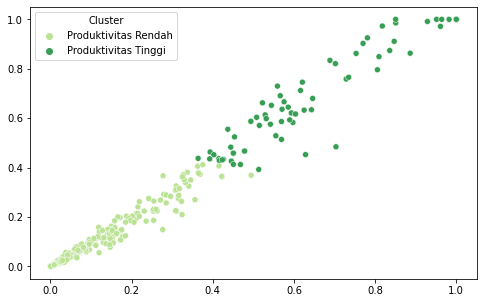

In [72]:
plt.figure(figsize=(8,5))
sns.scatterplot(x_train[:,0], x_train[:,1], hue = "Cluster", palette = "YlGn", data = data)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

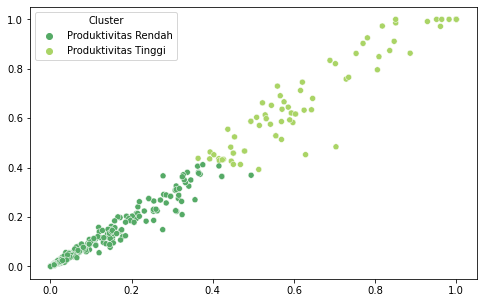

In [73]:
plt.figure(figsize=(8,5))
sns.scatterplot(x_train[:,0], x_train[:,1], hue = "Cluster", palette = "summer", data = data)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

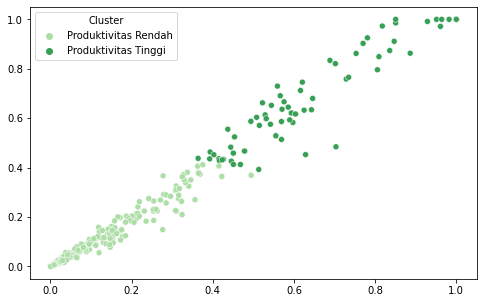

In [74]:
plt.figure(figsize=(8,5))
sns.scatterplot(x_train[:,0], x_train[:,1], hue = "Cluster", palette = "Greens", data = data)

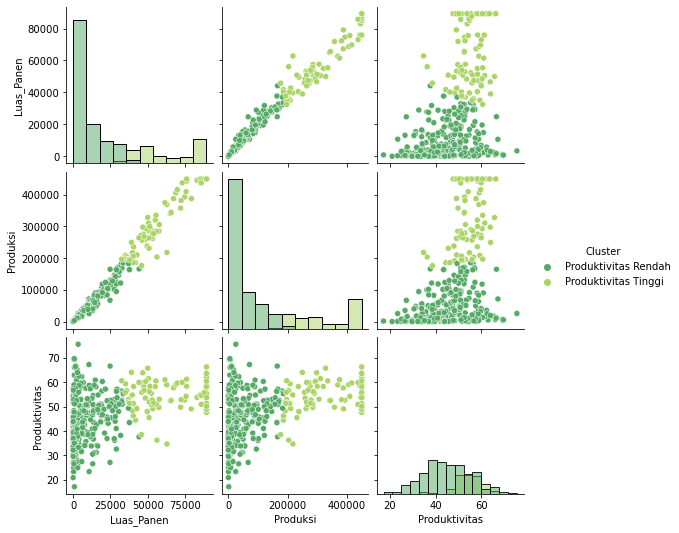

In [75]:
sns.pairplot(data, hue = "Cluster", diag_kind = "hist", palette = "summer")

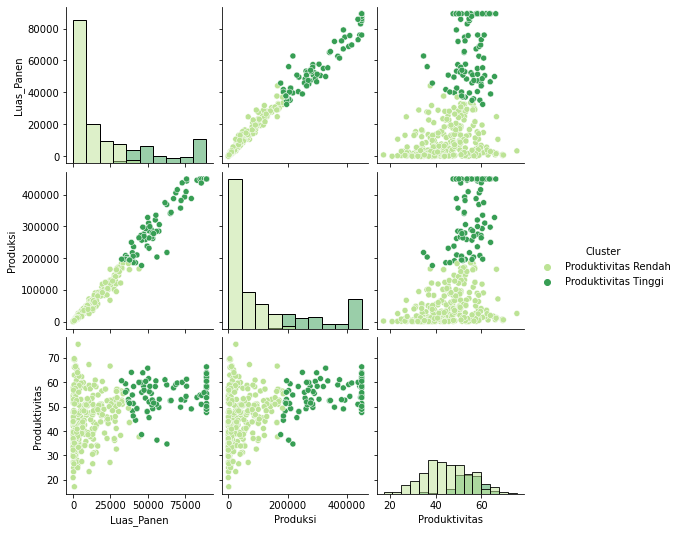

In [76]:
sns.pairplot(data, hue = "Cluster", diag_kind = "hist", palette = "YlGn")

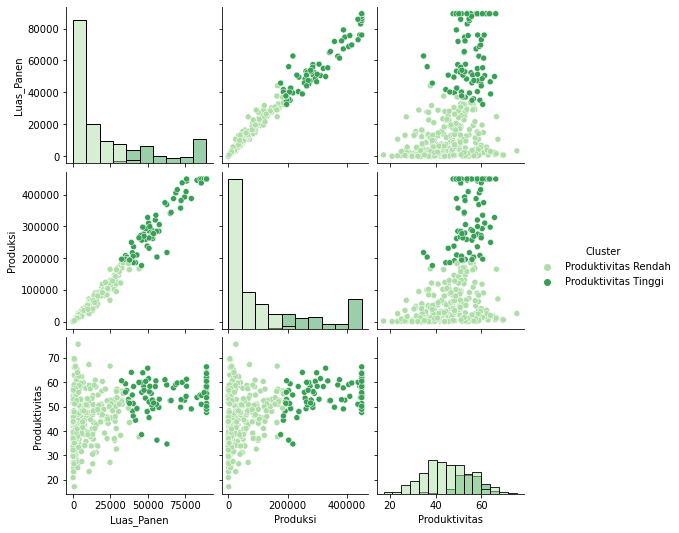

In [77]:
sns.pairplot(data, hue = "Cluster", diag_kind = "hist", palette = "Greens")

In [78]:
# fungsi untuk membuat labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # panjang column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=-15, fontsize=10)
    ax = sns.countplot(data=data, x=feature, palette="summer", 
                       order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", 
                    size=10, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

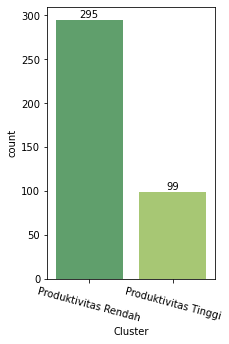

In [79]:
labeled_barplot(data, "Cluster")

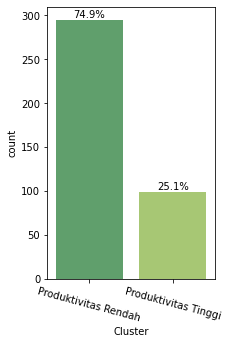

In [80]:
labeled_barplot(data, "Cluster", perc=True)

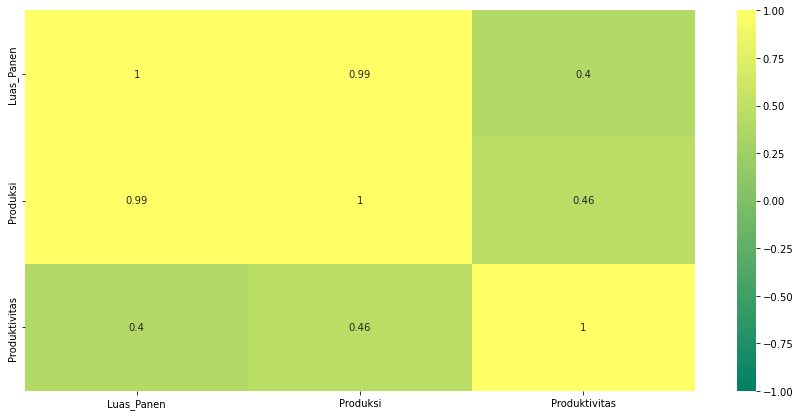

In [81]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap = "summer")
plt.show()

### Dataset Hasil Cluster

In [82]:
data[:50]

,Provinsi,Kabupaten/Kota,Luas_Panen,Produksi,Produktivitas,Cluster
0,Aceh,Simeulue,7467.2300,29531.60000,39.548266,Produktivitas Rendah
1,NaN,Aceh Singkil,647.3500,3352.40000,51.786514,Produktivitas Rendah
2,NaN,Aceh Selatan,9012.6100,45434.54000,50.412189,Produktivitas Rendah
3,NaN,Aceh Tenggara,10589.7500,71180.62000,67.216525,Produktivitas Rendah
4,NaN,Aceh Timur,27439.7200,138588.25000,50.506437,Produktivitas Rendah
5,NaN,Aceh Tengah,3359.4100,15954.90000,47.493161,Produktivitas Rendah
6,NaN,Aceh Barat,12522.8700,58610.28000,46.802594,Produktivitas Rendah
7,NaN,Aceh Besar,35118.2600,208379.76000,59.336584,Produktivitas Tinggi
8,NaN,Pidie,35949.3800,203324.82000,56.558644,Produktivitas Tinggi
9,NaN,Pidie,24766.9400,164923.72000,66.590269,Produktivitas Rendah


In [83]:
data[50:100]

,Provinsi,Kabupaten/Kota,Luas_Panen,Produksi,Produktivitas,Cluster
50,NaN,Tebing Tinggi,23468.00,101237.00,43.138316,Produktivitas Rendah
51,NaN,Medan,12969.00,60480.00,46.634282,Produktivitas Rendah
52,NaN,Binjai,13421.00,63801.00,47.538186,Produktivitas Rendah
53,NaN,Padangsidimpuan,6333.00,26235.00,41.425865,Produktivitas Rendah
54,NaN,Gunungsitoli,53003.00,279344.00,52.703432,Produktivitas Tinggi
55,NaN,Tojo Una-una,1283.00,5233.00,40.787217,Produktivitas Rendah
56,NaN,Sigi,17229.00,87082.00,50.543850,Produktivitas Rendah
57,NaN,Morowali Utara,7324.00,32533.00,44.419716,Produktivitas Rendah
58,NaN,Kota Palu,167.00,764.00,45.748503,Produktivitas Rendah
59,Sumatera Barat,Kepulauan Mentawai,376.77,940.98,24.974918,Produktivitas Rendah


In [84]:
data[100:150]

,Provinsi,Kabupaten/Kota,Luas_Panen,Produksi,Produktivitas,Cluster
100,NaN,Belitung,293.2500,682.87000,23.286275,Produktivitas Rendah
101,NaN,Bangka Barat,2577.6800,7234.07000,28.064267,Produktivitas Rendah
102,NaN,Bangka Tengah,121.7200,370.04000,30.400920,Produktivitas Rendah
103,NaN,Bangka Selatan,12823.3600,52458.93000,40.908880,Produktivitas Rendah
104,NaN,Belitung Timur,1240.7900,3898.20000,31.417081,Produktivitas Rendah
105,Kepulauan Riau,Karimun,23.1900,80.94000,34.902975,Produktivitas Rendah
106,NaN,Bintan,12.5400,43.40000,34.609250,Produktivitas Rendah
107,NaN,Natuna,109.4600,299.02000,27.317742,Produktivitas Rendah
108,NaN,Lingga,85.5100,282.12000,32.992632,Produktivitas Rendah
109,NaN,Kepulauan Anambas,39.4600,149.53000,37.894070,Produktivitas Rendah


In [85]:
data[150:200]

,Provinsi,Kabupaten/Kota,Luas_Panen,Produksi,Produktivitas,Cluster
150,NaN,Sragen,89292.3575,449770.66625,66.280204,Produktivitas Tinggi
151,NaN,Grobogan,89292.3575,449770.66625,60.373952,Produktivitas Tinggi
152,NaN,Blora,89292.3575,449770.66625,48.902867,Produktivitas Tinggi
153,NaN,Rembang,37034.0000,196084.00000,52.947022,Produktivitas Tinggi
154,NaN,Pati,89292.3575,449770.66625,55.372830,Produktivitas Tinggi
155,NaN,Kudus,30112.0000,171357.00000,56.906549,Produktivitas Rendah
156,NaN,Jepara,39785.0000,191726.00000,48.190524,Produktivitas Tinggi
157,NaN,Demak,89292.3575,449770.66625,61.931131,Produktivitas Tinggi
158,NaN,Semarang,24906.0000,131043.00000,52.615033,Produktivitas Rendah
159,NaN,Temanggung,10722.0000,62967.00000,58.726917,Produktivitas Rendah


In [86]:
data[200:250]

,Provinsi,Kabupaten/Kota,Luas_Panen,Produksi,Produktivitas,Cluster
200,NaN,Sumenep,39662.91,217162.68,54.752079,Produktivitas Tinggi
201,NaN,Kota Kediri,1806.95,10396.11,57.534021,Produktivitas Rendah
202,NaN,Kota Blitar,891.13,5888.25,66.076218,Produktivitas Rendah
203,NaN,Kota Malang,1833.55,12215.73,66.623381,Produktivitas Rendah
204,NaN,Kota Probolinggo,1537.12,8978.39,58.410469,Produktivitas Rendah
205,NaN,Kota Pasuruan,1562.96,8614.04,55.113631,Produktivitas Rendah
206,NaN,Kota Mojokerto,744.23,4386.19,58.935947,Produktivitas Rendah
207,NaN,Kota Madiun,2215.00,13416.04,60.569029,Produktivitas Rendah
208,NaN,Kota Surabaya,1733.35,10206.22,58.881472,Produktivitas Rendah
209,NaN,Kota Batu,749.09,5216.21,69.633956,Produktivitas Rendah


In [87]:
data[250:300]

,Provinsi,Kabupaten/Kota,Luas_Panen,Produksi,Produktivitas,Cluster
250,NaN,Manggarai Barat,20641.00,100874.00,48.870694,Produktivitas Rendah
251,NaN,Sumba Tengah,6510.00,27757.00,42.637481,Produktivitas Rendah
252,NaN,Sumba Barat Daya,12204.00,41311.00,33.850377,Produktivitas Rendah
253,NaN,Nagekeo,7694.00,29776.00,38.700286,Produktivitas Rendah
254,NaN,Manggarai Timur,15669.00,66798.00,42.630672,Produktivitas Rendah
255,NaN,Sabu Raijua,1503.00,8634.00,57.445110,Produktivitas Rendah
256,NaN,Malaka,4649.00,20239.00,43.534093,Produktivitas Rendah
257,NaN,Kota Kupang,264.00,1498.00,56.742424,Produktivitas Rendah
258,Kalimantan Tengah,Kotawaringin Barat,123.95,473.52,38.202501,Produktivitas Rendah
259,NaN,Kotawaringin Timur,15415.72,48124.94,31.218094,Produktivitas Rendah


In [88]:
data[300:350]

,Provinsi,Kabupaten/Kota,Luas_Panen,Produksi,Produktivitas,Cluster
300,NaN,Minahasa Utara,1633.1500,6543.38000,40.066007,Produktivitas Rendah
301,NaN,Bolaang Mongondow Utara,5577.8300,17609.58000,31.570665,Produktivitas Rendah
302,NaN,Minahasa Tenggara,1673.7600,5742.77000,34.310594,Produktivitas Rendah
303,NaN,Bolaang Mongondow Selatan,1457.0000,5742.75000,39.414894,Produktivitas Rendah
304,NaN,Bolaang Mongondow Timur,962.0600,4156.57000,43.204894,Produktivitas Rendah
305,NaN,Bitung,57.0700,219.21000,38.410724,Produktivitas Rendah
306,NaN,Tomohon,387.1600,2048.37000,52.907583,Produktivitas Rendah
307,NaN,Kotamobagu,3272.0600,14530.50000,44.407804,Produktivitas Rendah
308,Sulawesi Tengah,Banggai Kepulauan,501.0000,1880.00000,37.524950,Produktivitas Rendah
309,NaN,Banggai,37694.0000,163827.00000,43.462355,Produktivitas Rendah


In [91]:
data[350:]

,Provinsi,Kabupaten/Kota,Luas_Panen,Produksi,Produktivitas,Cluster
350,NaN,Kolaka Utara,1002.62,4022.68,40.121681,Produktivitas Rendah
351,NaN,Buton Utara,838.21,3056.53,36.464967,Produktivitas Rendah
352,NaN,Konawe Utara,2076.50,7645.56,36.819456,Produktivitas Rendah
353,NaN,Kolaka Timur,19547.25,91262.65,46.688230,Produktivitas Rendah
354,NaN,Konawe Kepulauan,127.63,508.68,39.855833,Produktivitas Rendah
355,NaN,Muna Barat,1361.48,5540.39,40.693877,Produktivitas Rendah
356,NaN,Buton Selatan,1.66,5.55,33.433735,Produktivitas Rendah
357,NaN,Kota Kendari,626.24,2156.60,34.437276,Produktivitas Rendah
358,NaN,Kota Baubau,1931.84,8250.03,42.705555,Produktivitas Rendah
359,Gorontalo,Boalemo,6396.81,27961.15,43.711084,Produktivitas Rendah


In [101]:
C0 = data[data["Cluster"]=="Produktivitas Rendah"]
C0[0:50]

,Provinsi,Kabupaten/Kota,Luas_Panen,Produksi,Produktivitas,Cluster
0,Aceh,Simeulue,7467.23,29531.60,39.548266,Produktivitas Rendah
1,NaN,Aceh Singkil,647.35,3352.40,51.786514,Produktivitas Rendah
2,NaN,Aceh Selatan,9012.61,45434.54,50.412189,Produktivitas Rendah
3,NaN,Aceh Tenggara,10589.75,71180.62,67.216525,Produktivitas Rendah
4,NaN,Aceh Timur,27439.72,138588.25,50.506437,Produktivitas Rendah
5,NaN,Aceh Tengah,3359.41,15954.90,47.493161,Produktivitas Rendah
6,NaN,Aceh Barat,12522.87,58610.28,46.802594,Produktivitas Rendah
9,NaN,Pidie,24766.94,164923.72,66.590269,Produktivitas Rendah
11,NaN,Aceh Barat Daya,13383.10,73020.49,54.561716,Produktivitas Rendah
12,NaN,Gayo Lues,4328.50,24807.81,57.312718,Produktivitas Rendah


In [102]:
C0[50:100]

,Provinsi,Kabupaten/Kota,Luas_Panen,Produksi,Produktivitas,Cluster
66,NaN,Lima Puluh Kota,28119.14,123703.37,43.992587,Produktivitas Rendah
67,NaN,Pasaman,28220.58,129629.39,45.934346,Produktivitas Rendah
68,NaN,Solok Selatan,13693.36,54869.13,40.069881,Produktivitas Rendah
69,NaN,Dharmasraya,5226.46,25537.80,48.862519,Produktivitas Rendah
70,NaN,Pasaman Barat,11023.77,52247.64,47.395437,Produktivitas Rendah
71,NaN,Kota Padang,9370.93,47258.32,50.430768,Produktivitas Rendah
72,NaN,Kota Solok,2175.86,12775.72,58.715726,Produktivitas Rendah
73,NaN,Kota Sawahlunto,1457.89,7896.95,54.166981,Produktivitas Rendah
74,NaN,Kota Padang Panjang,784.29,4933.85,62.908490,Produktivitas Rendah
75,NaN,Kota Bukittinggi,479.69,3325.28,69.321437,Produktivitas Rendah


In [103]:
C0[100:150]

,Provinsi,Kabupaten/Kota,Luas_Panen,Produksi,Produktivitas,Cluster
131,NaN,Kota Cirebon,231.68,1244.61,53.721081,Produktivitas Rendah
132,NaN,Kota Bekasi,477.98,2304.54,48.214151,Produktivitas Rendah
133,NaN,Kota Depok,45.39,244.35,53.833443,Produktivitas Rendah
134,NaN,Kota Cimahi,76.62,442.71,57.779953,Produktivitas Rendah
135,NaN,Kota Tasikmalaya,8539.85,49118.08,57.516326,Produktivitas Rendah
136,NaN,Kota Banjar,5723.33,35624.74,62.244777,Produktivitas Rendah
139,NaN,Purbalingga,29420.00,157840.00,53.650578,Produktivitas Rendah
140,NaN,Banjarnegara,19231.00,108445.00,56.390723,Produktivitas Rendah
143,NaN,Wonosobo,13259.00,67479.00,50.892978,Produktivitas Rendah
144,NaN,Magelang,32597.00,169584.00,52.024419,Produktivitas Rendah


In [104]:
C0[150:200]

,Provinsi,Kabupaten/Kota,Luas_Panen,Produksi,Produktivitas,Cluster
233,NaN,Lombok Utara,5341.12,31842.48,59.617608,Produktivitas Rendah
234,NaN,Kota Mataram,2608.03,16991.83,65.151973,Produktivitas Rendah
235,NaN,Kota Bima,2395.33,12396.18,51.751450,Produktivitas Rendah
236,Nusa Tenggara Timur,Sumba Barat,8559.00,30574.00,35.721463,Produktivitas Rendah
237,NaN,Sumba Timur,15867.00,54189.00,34.152014,Produktivitas Rendah
238,NaN,Kupang,16498.00,55838.00,33.845315,Produktivitas Rendah
239,NaN,Timor Tengah Selatan,3345.00,14539.00,43.464873,Produktivitas Rendah
240,NaN,Timor Tengah Utara,7685.00,32661.00,42.499675,Produktivitas Rendah
241,NaN,Belu,5242.00,22449.00,42.825258,Produktivitas Rendah
242,NaN,Alor,951.00,3196.00,33.606730,Produktivitas Rendah


In [105]:
C0[200:250]

,Provinsi,Kabupaten/Kota,Luas_Panen,Produksi,Produktivitas,Cluster
285,Kalimantan Timur,Paser,13157.31,50864.78,38.658951,Produktivitas Rendah
286,NaN,Kutai Barat,516.56,1981.39,38.357403,Produktivitas Rendah
287,NaN,Kutai Kartanegara,27746.86,100311.19,36.152267,Produktivitas Rendah
288,NaN,Kutai Timur,3664.64,12937.59,35.303850,Produktivitas Rendah
289,NaN,Berau,5828.23,22723.95,38.989453,Produktivitas Rendah
290,NaN,Penajam Paser Utara,13821.74,42886.18,31.028062,Produktivitas Rendah
291,NaN,Mahakam Ulu,232.22,932.09,40.138231,Produktivitas Rendah
292,NaN,Balikpapan,103.67,376.34,36.301727,Produktivitas Rendah
293,NaN,Samarinda,1738.07,7274.41,41.853378,Produktivitas Rendah
294,NaN,Bontang,83.94,352.88,42.039552,Produktivitas Rendah


In [106]:
C0[250:]

,Provinsi,Kabupaten/Kota,Luas_Panen,Produksi,Produktivitas,Cluster
348,NaN,Konawe Selatan,22705.43,83864.92,36.936063,Produktivitas Rendah
349,NaN,Bombana,16520.52,80560.37,48.763822,Produktivitas Rendah
350,NaN,Kolaka Utara,1002.62,4022.68,40.121681,Produktivitas Rendah
351,NaN,Buton Utara,838.21,3056.53,36.464967,Produktivitas Rendah
352,NaN,Konawe Utara,2076.50,7645.56,36.819456,Produktivitas Rendah
353,NaN,Kolaka Timur,19547.25,91262.65,46.688230,Produktivitas Rendah
354,NaN,Konawe Kepulauan,127.63,508.68,39.855833,Produktivitas Rendah
355,NaN,Muna Barat,1361.48,5540.39,40.693877,Produktivitas Rendah
356,NaN,Buton Selatan,1.66,5.55,33.433735,Produktivitas Rendah
357,NaN,Kota Kendari,626.24,2156.60,34.437276,Produktivitas Rendah


In [107]:
C1 = data[data["Cluster"]=="Produktivitas Tinggi"]
C1[0:50]

,Provinsi,Kabupaten/Kota,Luas_Panen,Produksi,Produktivitas,Cluster
7,NaN,Aceh Besar,35118.2600,208379.76000,59.336584,Produktivitas Tinggi
8,NaN,Pidie,35949.3800,203324.82000,56.558644,Produktivitas Tinggi
10,NaN,Aceh Utara,62689.4400,369137.53000,58.883526,Produktivitas Tinggi
23,NaN,Mandailing Natal,42699.0000,210060.00000,49.195532,Produktivitas Tinggi
27,NaN,Toba Samosir,49583.0000,237863.00000,47.972692,Produktivitas Tinggi
29,NaN,Asahan,40229.0000,206262.00000,51.271968,Produktivitas Tinggi
32,NaN,Karo,89292.3575,449770.66625,48.909839,Produktivitas Tinggi
33,NaN,Deli Serdang,47466.0000,269147.00000,56.703114,Produktivitas Tinggi
34,NaN,Langkat,89292.3575,449770.66625,50.129518,Produktivitas Tinggi
35,NaN,Nias Selatan,89292.3575,449770.66625,53.671087,Produktivitas Tinggi


In [108]:
C1[50:]

,Provinsi,Kabupaten/Kota,Luas_Panen,Produksi,Produktivitas,Cluster
165,NaN,Brebes,86088.0000,449770.66625,54.582520,Produktivitas Tinggi
173,NaN,Ponorogo,69735.3400,416103.97000,59.669024,Produktivitas Tinggi
175,NaN,Tulungagung,40494.3800,235804.49000,58.231411,Produktivitas Tinggi
176,NaN,Blitar,39018.1500,249765.67000,64.012689,Produktivitas Tinggi
177,NaN,KKediri,35032.8500,195806.96000,55.892387,Produktivitas Tinggi
178,NaN,Malang,48605.6500,293279.94000,60.338652,Produktivitas Tinggi
179,NaN,Lumajang,57683.4500,305846.79000,53.021584,Produktivitas Tinggi
180,NaN,Jember,89292.3575,449770.66625,49.667167,Produktivitas Tinggi
181,NaN,Banyuwangi,89292.3575,449770.66625,57.641955,Produktivitas Tinggi
182,NaN,Bondowoso,52634.2500,266771.59000,50.684030,Produktivitas Tinggi
